![lop](../../images/logo_diive1_128px.png)

# **Quantile grid aggregator**

---
**Notebook version**: `1` (23 Jul 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)

</br>

# **General usage**

```python
import diive as dv
dv.ga(...)
dv.gridaggregator(...)  # Alternative
```

</br>

# **Description**

- Performs data aggregation over a 2D grid based on specified binning mechanisms.
- The GridAggregator class facilitates the aggregation of Z-axis data over a 2D grid defined by X and Y axes. The binning can be configured through quantiles, equal-width bins, or custom bins. The class supports multiple aggregation functions, including built-in statistical measures and custom callable functions.
- This example shows mean vapor pressure deficit (z) in classes of radiation (x) and air temperature (y) quantiles.
- See docstring below for additional details.

</br>

# **Imports**

In [1]:
import diive as dv
import importlib.metadata
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.89.0


</br>

# **Docstring**

In [2]:
help(dv.ga)

Help on class GridAggregator in module diive.pkgs.analyses.gridaggregator:

class GridAggregator(builtins.object)
 |  GridAggregator(x: pandas.core.series.Series, y: pandas.core.series.Series, z: pandas.core.series.Series, binning_type: Literal['quantiles', 'equal_width', 'custom'], n_bins: int = 10, min_n_vals_per_bin: int = 1, aggfunc: Union[Literal['mean', 'min', 'max', 'median', 'sum', 'count'], Callable] = 'mean', custom_x_bins: Union[numpy.ndarray, list, NoneType] = None, custom_y_bins: Union[numpy.ndarray, list, NoneType] = None)
 |  
 |  Performs data aggregation over a 2D grid based on specified binning mechanisms.
 |  
 |  The GridAggregator class facilitates the aggregation of Z-axis data over a
 |  2D grid defined by X and Y axes. The binning can be configured through
 |  quantiles, equal-width bins, or custom bins. The class supports multiple aggregation
 |  functions, including built-in statistical measures and custom callable functions.
 |  
 |  Attributes:
 |      x (pd

</br>

# **Load example data**

In [3]:
df = dv.load_exampledata_parquet()
df

Loaded .parquet file F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.060 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,ET_f,GPP_CUT_16_f,GPP_CUT_84_f,GPP_CUT_REF_f,GPP_DT_CUT_16,GPP_DT_CUT_84,GPP_DT_CUT_REF,LE_f,LE_orig,LW_IN,NEE_CUT_16_f,NEE_CUT_16_orig,NEE_CUT_84_f,NEE_CUT_84_orig,NEE_CUT_REF_f,...,Reco_CUT_84,Reco_CUT_REF,Reco_DT_CUT_16,Reco_DT_CUT_84,Reco_DT_CUT_REF,Reco_DT_CUT_REF_SD,Rg_f,Rg_orig,RH,SWC_FF0_0.15_1,Tair_f,Tair_orig,Ustar_CUT_REF_Thres,VPD_f,VPD_orig
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:15:00,0.290,0.510,-0.082,0.705,0.0,0.0,0.0,13.093,NaN,194.913,1.376,NaN,1.537,NaN,1.595,...,1.455,2.300,1.252,1.908,1.613,0.510,0.0,0.0,31.933,34.977,-1.618,-1.618,0.288,1.339,1.339
2013-01-01 00:45:00,0.290,0.512,-0.084,0.708,0.0,0.0,0.0,13.093,NaN,193.568,1.376,NaN,1.537,NaN,1.595,...,1.454,2.303,1.241,1.914,1.616,0.512,0.0,0.0,32.600,34.977,-1.630,-1.630,0.288,1.337,1.337
2013-01-01 01:15:00,0.290,0.514,-0.086,0.710,0.0,0.0,0.0,13.066,NaN,193.135,1.376,NaN,1.537,NaN,1.595,...,1.452,2.305,1.230,1.920,1.619,0.515,0.0,0.0,38.867,34.971,-1.644,-1.644,0.288,1.335,1.335
2013-01-01 01:45:00,0.290,1.354,-0.088,1.771,0.0,0.0,0.0,13.066,NaN,192.083,0.538,0.538,1.537,NaN,0.538,...,1.450,2.308,1.219,1.926,1.622,0.518,0.0,0.0,37.767,34.975,-1.657,-1.657,0.288,1.332,1.332
2013-01-01 02:15:00,0.377,0.545,-0.080,0.797,0.0,0.0,0.0,16.995,NaN,192.677,1.544,NaN,1.709,NaN,1.765,...,1.630,2.562,1.347,2.105,1.790,0.578,0.0,0.0,39.533,34.967,-0.567,-0.567,0.288,3.545,3.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:45:00,-0.016,0.373,0.203,0.600,0.0,0.0,0.0,-0.735,-0.735,230.499,0.629,NaN,1.253,NaN,1.224,...,1.456,1.824,2.568,1.221,1.032,0.759,0.0,0.0,71.790,19.572,3.463,3.463,0.288,2.210,2.210
2022-12-31 22:15:00,0.105,-2.379,0.894,-1.433,0.0,0.0,0.0,4.724,4.724,231.788,3.518,3.518,0.803,NaN,3.518,...,1.697,2.085,2.959,1.356,1.174,0.838,0.0,0.0,62.627,19.577,5.283,5.283,0.288,3.327,3.327
2022-12-31 22:45:00,0.220,-0.515,0.926,-0.305,0.0,0.0,0.0,9.840,NaN,237.303,1.673,NaN,0.803,NaN,2.424,...,1.729,2.119,3.038,1.367,1.199,0.857,0.0,0.0,61.747,19.589,5.537,5.537,0.288,3.467,3.467


## Make subset

In [4]:
# Make subset of three required columns
vpd_col = 'VPD_f'  # Vapor pressure deficit
ta_col = 'Tair_f'  # Air temperature
swin_col = 'Rg_f'  # Shortwave incoming radiation
subset = df[[vpd_col, ta_col, swin_col]].copy()
subset = subset.loc[(subset.index.month >= 5) & (subset.index.month <= 9)].copy()  # Use data May and Sep
daytime_locs = (subset[swin_col] > 0)  # Use daytime data 
subset = subset[daytime_locs].copy()
subset = subset.dropna()

In [5]:
subset

,VPD_f,Tair_f,Rg_f
TIMESTAMP_MIDDLE,,,
2013-05-01 05:15:00,2.843,7.667,2.912
2013-05-01 05:45:00,1.425,5.967,21.093
2013-05-01 06:15:00,1.460,6.167,50.277
2013-05-01 06:45:00,1.587,6.700,96.650
2013-05-01 07:15:00,1.586,6.900,162.190
...,...,...,...
2022-09-30 16:15:00,0.156,3.217,111.235
2022-09-30 16:45:00,0.146,3.170,77.094
2022-09-30 17:15:00,0.121,3.203,56.054


</br>

# Example (1): Quantile binning: Calculate mean of z in 10 quantile bins of x and y

In [6]:
q = dv.ga(
    x=subset[swin_col],
    y=subset[ta_col],
    z=subset[vpd_col],
    binning_type='quantiles',
    n_bins=10,
    min_n_vals_per_bin=5,
    aggfunc='mean'
)

In [7]:
# Aggregated wide dataframe
df_agg_wide = q.df_agg_wide.copy()
df_agg_wide

BIN_Rg_f,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
BIN_Tair_f,,,,,,,,,,
0.0,0.738029,0.882306,0.907608,0.783157,0.882975,1.210846,1.484725,1.906702,2.124990,2.569857
10.0,1.109053,1.247962,1.250752,1.205217,1.362100,1.741093,2.281106,2.827544,3.221641,3.404728
20.0,1.359257,1.609306,1.517805,1.466337,1.760117,2.230852,2.803953,3.519970,3.936581,4.287607
30.0,1.803614,1.966310,1.899482,1.815355,2.243760,3.295720,3.494331,4.207591,4.818127,5.080783
40.0,2.191474,2.617581,2.407728,2.455835,2.951037,3.803165,4.380593,4.944201,5.332908,6.178695
50.0,3.147071,3.443443,3.602171,3.537326,3.662930,4.668226,5.442874,6.001373,6.345775,7.025564
60.0,4.698872,5.107422,5.021604,5.149920,5.501511,6.077052,6.522451,7.160304,7.789453,8.057696
70.0,6.514295,6.915953,7.306498,7.352755,7.474100,8.062731,8.563870,8.860974,9.411137,9.825721
80.0,9.090340,9.430653,9.720280,9.983868,10.115974,10.705982,11.236660,11.251576,12.075453,12.163915


In [8]:
# Aggregated long dataframe
df_agg_long = q.df_agg_long.copy()
df_agg_long

,BIN_Tair_f,BIN_Rg_f,VPD_f
0,0.0,0.0,0.738029
1,10.0,0.0,1.109053
2,20.0,0.0,1.359257
3,30.0,0.0,1.803614
4,40.0,0.0,2.191474
...,...,...,...
95,50.0,90.0,7.025564
96,60.0,90.0,8.057696
97,70.0,90.0,9.825721
98,80.0,90.0,12.163915


In [9]:
# Non-aggregated long dataframe
df_long = q.df_long.copy()
df_long

,INDEX,Rg_f,Tair_f,VPD_f,BIN_Rg_f,BIN_Tair_f,BIN_COMBINED_STR
0,2013-05-01 05:15:00,2.912,7.667,2.843,0.0,20.0,0.0+20.0
1,2013-05-01 05:45:00,21.093,5.967,1.425,10.0,10.0,10.0+10.0
2,2013-05-01 06:15:00,50.277,6.167,1.460,20.0,10.0,20.0+10.0
3,2013-05-01 06:45:00,96.650,6.700,1.587,30.0,10.0,30.0+10.0
4,2013-05-01 07:15:00,162.190,6.900,1.586,40.0,10.0,40.0+10.0
...,...,...,...,...,...,...,...
45442,2022-09-30 16:15:00,111.235,3.217,0.156,30.0,0.0,30.0+0.0
45443,2022-09-30 16:45:00,77.094,3.170,0.146,20.0,0.0,20.0+0.0
45444,2022-09-30 17:15:00,56.054,3.203,0.121,20.0,0.0,20.0+0.0
45445,2022-09-30 17:45:00,27.603,3.367,0.128,10.0,0.0,10.0+0.0


## Plot

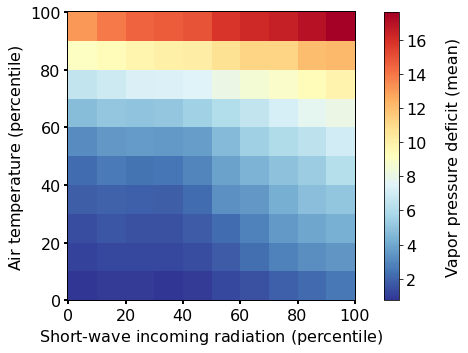

In [10]:
hm = dv.heatmapxyz(
    x=df_agg_long[f'BIN_{swin_col}'],
    y=df_agg_long[f'BIN_{ta_col}'],
    z=df_agg_long[vpd_col],
    cb_digits_after_comma=0,
    xlabel=r'Short-wave incoming radiation ($\mathrm{percentile}$)',
    ylabel=r'Air temperature ($\mathrm{percentile}$)',
    zlabel=r'Vapor pressure deficit (mean)'
)
hm.plot()

</br>

</br>

# Example (2): Equal-width binning: Calculate mean of z in 10 equal-width classes of x and y

In [11]:
q = dv.ga(
    x=subset[swin_col],
    y=subset[ta_col],
    z=subset[vpd_col],
    binning_type='equal_width',
    n_bins=10,
    min_n_vals_per_bin=5,
    aggfunc='mean'
)

In [12]:
# Aggregated wide dataframe
df_agg_wide = q.df_agg_wide.copy()
df_agg_wide

BIN_Rg_f,0.001,119.781,239.561,359.341,479.121,598.900,718.680,838.460,958.240,1078.020
BIN_Tair_f,,,,,,,,,,
-6.487,0.885972,0.959000,1.066091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.967,0.580404,0.628393,0.840132,1.033482,1.556469,1.128308,NaN,NaN,NaN,NaN
0.553,0.854034,0.863293,1.170580,1.485982,1.759944,2.045766,2.102755,2.506971,2.589103,NaN
4.073,1.206237,1.314746,1.767464,2.222575,2.602833,3.000476,3.373051,3.668349,3.117379,2.823077
7.593,1.870587,2.090561,2.920073,3.423054,3.984481,4.437408,4.603325,5.377300,5.287563,3.440083
11.113,3.569341,3.986919,4.730117,5.494463,6.006876,6.547202,6.853160,6.971063,7.864038,6.080944
14.633,7.080506,7.569661,8.232150,8.821617,8.941741,9.424770,9.854592,10.106191,10.408848,11.175375
18.153,11.504943,11.778267,12.495388,12.815184,12.914066,13.324159,13.759470,13.895101,14.398662,14.086500
21.673,16.235518,17.125154,18.071866,18.173447,18.140185,18.425809,18.392891,19.002774,19.621618,NaN


In [13]:
# Aggregated long dataframe
df_agg_long = q.df_agg_long.copy()
df_agg_long

,BIN_Tair_f,BIN_Rg_f,VPD_f
0,-6.487,0.001,0.885972
1,-2.967,0.001,0.580404
2,0.553,0.001,0.854034
3,4.073,0.001,1.206237
4,7.593,0.001,1.870587
...,...,...,...
93,4.073,1078.020,2.823077
94,7.593,1078.020,3.440083
95,11.113,1078.020,6.080944
96,14.633,1078.020,11.175375


## Plot

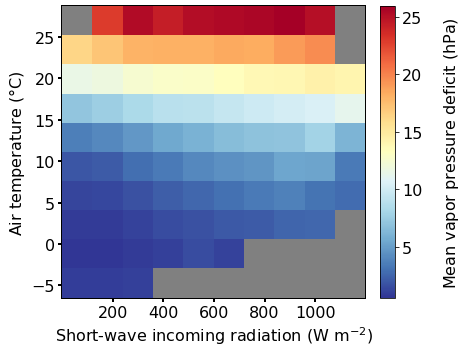

In [14]:
hm = dv.heatmapxyz(
    x=df_agg_long[f'BIN_{swin_col}'],
    y=df_agg_long[f'BIN_{ta_col}'],
    z=df_agg_long[vpd_col],
    cb_digits_after_comma=0,
    xlabel=r'Short-wave incoming radiation ($\mathrm{W\ m^{-2}}$)',
    ylabel=r'Air temperature ($\mathrm{°C}$)',
    zlabel=r'Mean vapor pressure deficit ($\mathrm{hPa}$)',
    # xtickpos=[25, 50, 75],
    # xticklabels=['25', '50', '75'],
    # ytickpos=[25, 50, 75],
    # yticklabels=['25', '50', '75']
)
hm.plot()

</br>

</br>

# Example (3): Custom binning: Calculate mean of z in custom classes of x and y

In [15]:
# Some info about data to define good custom bins that capture the whole data range
display(subset[swin_col].describe())
display(subset[ta_col].describe())

count    45447.000000
mean       341.843568
std        309.556056
min          0.001000
25%         54.222500
50%        253.400000
75%        593.995500
max       1197.800000
Name: Rg_f, dtype: float64

count    45447.000000
mean        11.971471
std          5.693556
min         -6.487000
25%          7.997000
50%         11.733000
75%         16.121500
max         28.713000
Name: Tair_f, dtype: float64

In [16]:
q = dv.ga(
    x=subset[swin_col],
    y=subset[ta_col],
    z=subset[vpd_col],
    binning_type='custom',
    custom_x_bins=list(range(0, 1300, 100)),  # Creates list from 0 to 1200 with step-size 100, this way the max value 1197.8 is included in the highest bin
    custom_y_bins=list(range(-7, 30, 1)),  # Creates list from -7 to 29 with step-size 1, this way the max value of 28.713 is included in the highest bin    
    min_n_vals_per_bin=5,
    aggfunc='mean'
)

In [17]:
# Aggregated wide dataframe
df_agg_wide = q.df_agg_wide.copy()
df_agg_wide

BIN_Rg_f,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,1100.0
BIN_Tair_f,,,,,,,,,,,,
-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-6.0,1.044286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.0,1.432600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4.0,0.672158,0.775143,1.241000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.0,0.683549,0.482833,0.829625,1.231444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.0,0.615644,0.653917,0.614000,1.057917,1.430083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.0,0.645220,0.487575,0.809250,0.811143,0.675250,1.323667,NaN,NaN,NaN,NaN,NaN,NaN
0.0,0.567952,0.572082,0.778158,0.870857,1.262476,1.494000,0.905111,1.487833,NaN,NaN,NaN,NaN
1.0,0.776714,0.789706,0.844698,1.060652,1.291200,1.529607,1.642437,1.859875,1.580800,NaN,NaN,NaN


In [18]:
# Aggregated long dataframe
df_agg_long = q.df_agg_long.copy()
df_agg_long

,BIN_Tair_f,BIN_Rg_f,VPD_f
0,-7.0,0.0,NaN
1,-6.0,0.0,1.044286
2,-5.0,0.0,1.432600
3,-4.0,0.0,0.672158
4,-3.0,0.0,0.683549
...,...,...,...
427,24.0,1100.0,NaN
428,25.0,1100.0,NaN
429,26.0,1100.0,NaN
430,27.0,1100.0,NaN


## Plot

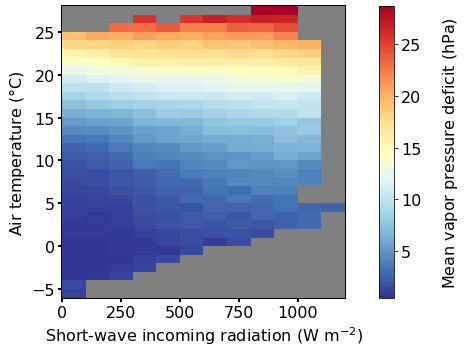

In [19]:
hm = dv.heatmapxyz(
    x=df_agg_long[f'BIN_{swin_col}'],
    y=df_agg_long[f'BIN_{ta_col}'],
    z=df_agg_long[vpd_col],
    cb_digits_after_comma=0,
    xlabel=r'Short-wave incoming radiation ($\mathrm{W\ m^{-2}}$)',
    ylabel=r'Air temperature ($\mathrm{°C}$)',
    zlabel=r'Mean vapor pressure deficit ($\mathrm{hPa}$)',
)
hm.plot()

In [20]:
df_long = q.df_long
df_long.loc[df_long[swin_col] > 1100]

,INDEX,Rg_f,Tair_f,VPD_f,BIN_Rg_f,BIN_Tair_f,BIN_COMBINED_STR
801,2013-05-27 11:15:00,1146.650,4.967,2.530,1100.0,4.0,1100.0+4.0
27109,2019-05-03 12:45:00,1120.900,4.487,1.969,1100.0,4.0,1100.0+4.0
36836,2021-05-20 13:15:00,1137.636,4.463,2.913,1100.0,4.0,1100.0+4.0
36927,2021-05-23 12:15:00,1197.800,4.423,2.324,1100.0,4.0,1100.0+4.0
36988,2021-05-25 11:45:00,1149.067,4.220,2.986,1100.0,4.0,1100.0+4.0


</br>

# **End of notebook**

In [21]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-07-23 15:17:44
